#                                            The Sparks Foundation

# Name - Deepak Saini

# #GRIPFEBRUARY22

# Prediction using Supervised ML


## Task-1 Predict the percentage of a student based on the no. of study hours

### STEP-1 import required packages/libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### STEP-1 Import data & read data

In [5]:
data = pd.read_csv("E:/Datasets/student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### STEP-3 check size of data set and check wheather a any field of data is NULL or not


In [6]:
print(data.shape)
data.isnull()

(25, 2)


,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### STEP-4 describe statistical description of data

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### STEP-5 plot scatter plot to visualize data

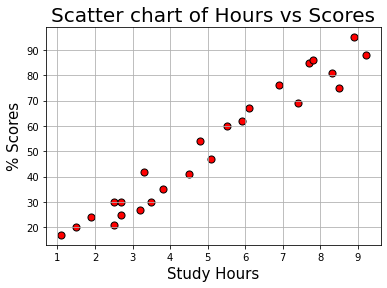

In [8]:
plt.scatter(data['Hours'], data['Scores'] , s = 50, c = 'r', edgecolor = 'black')
plt.title("Scatter chart of Hours vs Scores", size = 20)
plt.xlabel("Study Hours", size = 15)
plt.ylabel("% Scores", size = 15)
plt.grid(True)
plt.show()

### Here, independent variable is hours and dependent variable or target variable is scores which is dependent on hours

### Defining X & Y


In [9]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### And spliting data 

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### Tain the Model 

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, Y_train)

In [12]:
print(regressor.coef_)
print(regressor.intercept_)

[9.78856669]
2.370815382341881


### Plotting Regression Line 

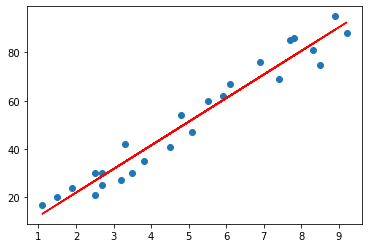

In [13]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line,color = 'red');
plt.show()


In [14]:
Y_pred = regressor.predict(X_test)
Prediction = pd.DataFrame({'Hours': [i[0] for i in X_test],"Predicted %" : regressor.predict(X_test)})
Prediction

,Hours,Predicted %
0,1.5,17.053665
1,3.2,33.694229
2,7.4,74.806209
3,2.5,26.842232
4,5.9,60.123359
5,3.8,39.567369
6,1.9,20.969092
7,7.8,78.721636


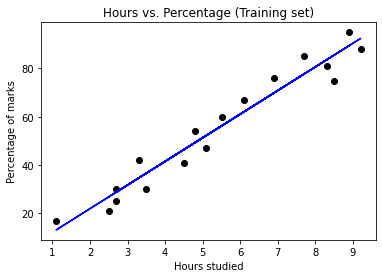

In [15]:
#Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'black')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

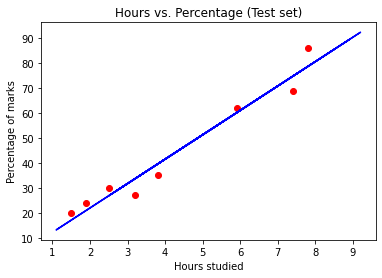

In [16]:
#Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'r')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [17]:
#Comparing the actual values with the predicted ones.
data1 = pd.DataFrame({'Actual': Y_test, "Predicted": Y_pred})  
data1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# Predicting the score for 9.25 hours/day

In [18]:
#predicting the score 
data = np.array(9.25)
data = data.reshape(-1, 1)
pred = regressor.predict(data)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].


In [19]:
from sklearn import metrics  

### Mean Absolute Error 

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))


Mean Absolute Error: 4.419727808027652


In [21]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(Y_test,Y_pred))

The R-Square of the model is:  0.9568211104435257
